#### Context

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. 

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).


#### Content

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

#### Target

Need to perform clustering to summarize customer segments.

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
# Reading and making a copy of the dataset
main_df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
df = main_df.copy()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Data Cleaning

In [4]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Checking if any NaN is present in column or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

* Here we have only 3 object type datatype and rest are numerical.

1. There are missing values in Income. We will drop the rows that have missing income values.
2. Dt_Customer that indicates the date a customer joined in this dataset is not parsed as DateTime.
3. We will encode the categorical features into numerical form later.

In [6]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [7]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print(f"Newest customer's enrolment date is {max(dates)-min(dates)}")
#print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 1063 days, 0:00:00


In [8]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
    
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")    

In [9]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Customer_For            663
dtype: int64

 In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them.  

* Income column have some missing value in it so we will need to fill it by by either mean or median.

In [10]:
# Dropping columns because they will not contribute anything in model building
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

# Feature Engineering

In [11]:
#Age of customer today 
df["Age"] = 2021-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Promotion
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

#For clarity
#df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status","Dt_Customer", "Year_Birth", "ID","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","MntWines","MntFruits","MntFishProducts","MntSweetProducts","MntSweetProducts","MntGoldProds","Kidhome","Teenhome"]
df = df.drop(to_drop, axis=1)
#,"Kidhome","Teenhome"

In [12]:
df.describe()

,Income,Recency,MntMeatProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Total Promo
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,166.950000,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,0.149107,4.424054e+16,52.194196,605.798214,0.950446,2.595089,0.715179,0.297768
std,25037.797168,28.962453,225.715373,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.356274,2.006466e+16,11.984069,602.249288,0.751803,0.906959,0.451430,0.678381
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,35538.750000,24.000000,16.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,2.944080e+16,44.000000,68.750000,0.000000,2.000000,0.000000,0.000000
50%,51741.500000,49.000000,67.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,4.432320e+16,51.000000,396.000000,1.000000,3.000000,1.000000,0.000000
75%,68289.750000,74.000000,232.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,5.920560e+16,62.000000,1045.500000,1.000000,3.000000,1.000000,0.000000
max,666666.000000,99.000000,1725.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000,4.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   MntMeatProducts      2240 non-null   int64  
 4   NumDealsPurchases    2240 non-null   int64  
 5   NumWebPurchases      2240 non-null   int64  
 6   NumCatalogPurchases  2240 non-null   int64  
 7   NumStorePurchases    2240 non-null   int64  
 8   NumWebVisitsMonth    2240 non-null   int64  
 9   Complain             2240 non-null   int64  
 10  Response             2240 non-null   int64  
 11  Customer_For         2240 non-null   int64  
 12  Age                  2240 non-null   int64  
 13  Spent                2240 non-null   int64  
 14  Living_With          2240 non-null   object 
 15  Children             2240 non-null   i

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

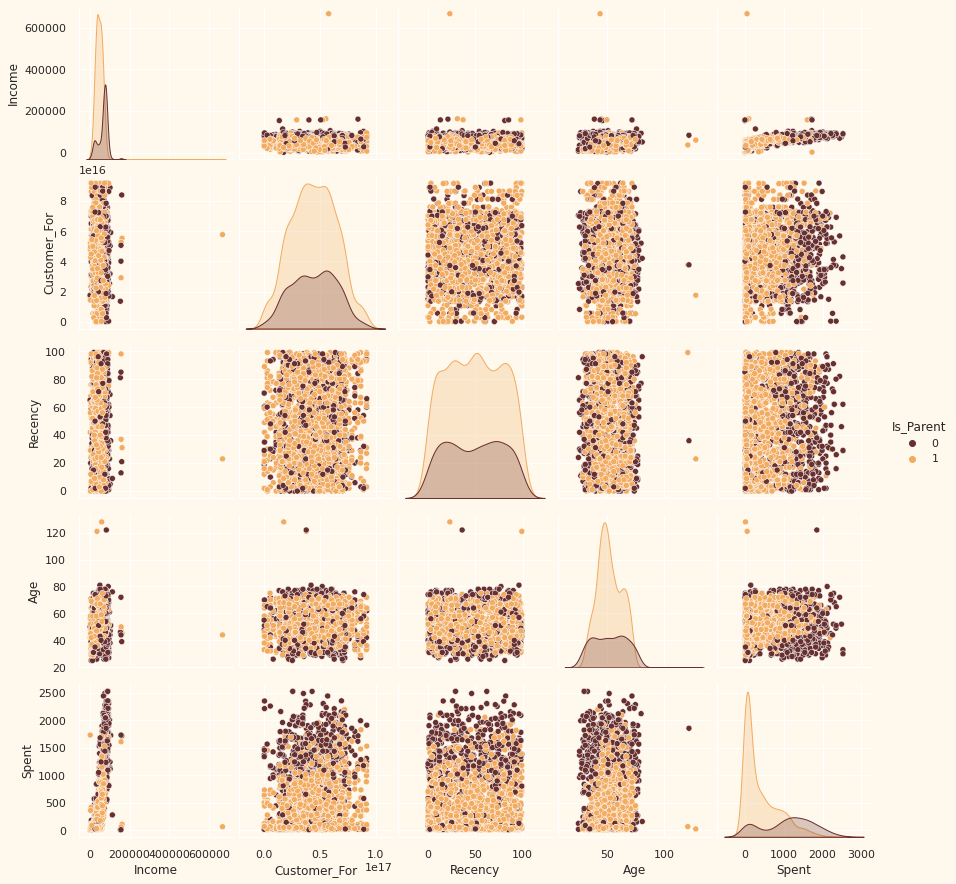

In [14]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income","Customer_For", "Recency", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [16]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

<AxesSubplot:>

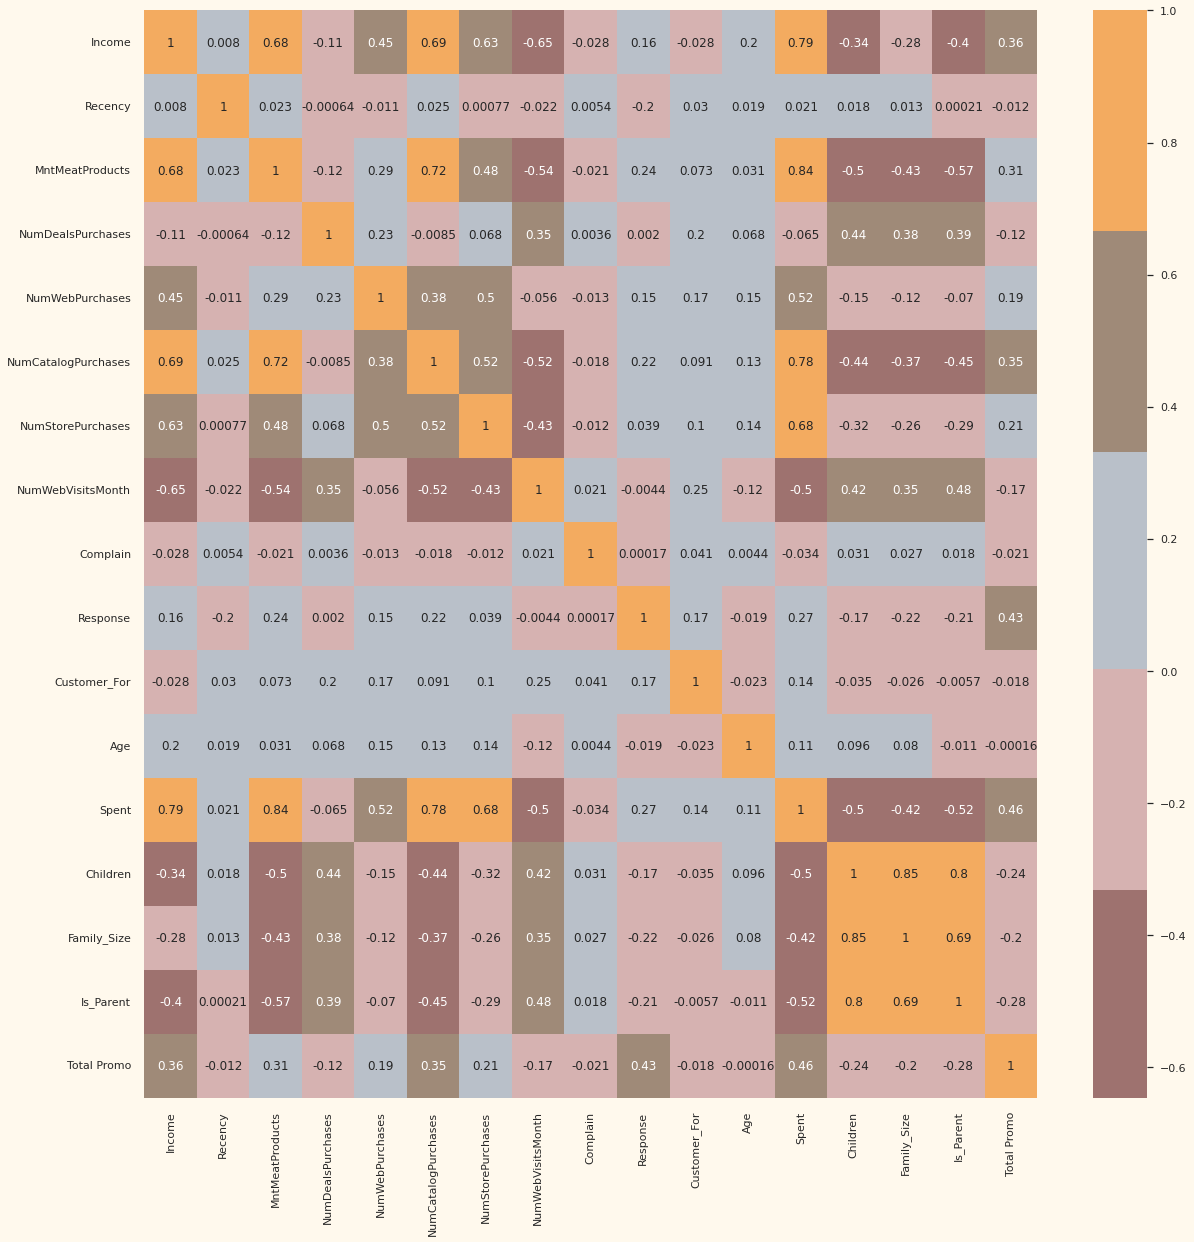

In [17]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

# Data Preprocessing

In [19]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [20]:
object_cols

['Education', 'Living_With']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   object 
 1   Income               2236 non-null   float64
 2   Recency              2236 non-null   int64  
 3   MntMeatProducts      2236 non-null   int64  
 4   NumDealsPurchases    2236 non-null   int64  
 5   NumWebPurchases      2236 non-null   int64  
 6   NumCatalogPurchases  2236 non-null   int64  
 7   NumStorePurchases    2236 non-null   int64  
 8   NumWebVisitsMonth    2236 non-null   int64  
 9   Complain             2236 non-null   int64  
 10  Response             2236 non-null   int64  
 11  Customer_For         2236 non-null   int64  
 12  Age                  2236 non-null   int64  
 13  Spent                2236 non-null   int64  
 14  Living_With          2236 non-null   object 
 15  Children             2236 non-null   i

In [22]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [23]:
df

,Education,Income,Recency,MntMeatProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total Promo
0,0,58138.0,58,546,3,8,10,4,7,0,1,83894400000000000,64,1617,0,0,1,0,0
1,0,46344.0,38,6,2,1,1,2,5,0,0,10800000000000000,67,27,0,2,3,1,0
2,0,71613.0,26,127,1,8,2,10,4,0,0,40780800000000000,56,776,1,0,2,0,0
3,0,26646.0,26,20,2,2,0,4,6,0,0,5616000000000000,37,53,1,1,3,1,0
4,1,58293.0,94,118,5,5,3,6,5,0,0,27734400000000000,40,422,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,182,2,9,3,4,5,0,0,46742400000000000,54,1341,1,1,3,1,0
2236,1,64014.0,56,30,7,8,2,5,7,0,0,5270400000000000,75,444,1,3,5,1,1
2237,0,56981.0,91,217,1,2,3,13,6,0,0,27216000000000000,40,1241,0,0,1,0,1
2238,1,69245.0,8,214,2,6,5,10,3,0,0,27302400000000000,65,843,1,1,3,1,0


In [24]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
#cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
#ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
ds_scaled = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [25]:
ds_scaled

,Education,Income,Recency,MntMeatProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total Promo
0,-0.89438,0.288513,0.306856,1.679746,0.348738,1.407639,2.509801,-0.552429,0.692865,-0.095001,2.386338,1.975467,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362,-0.438933
1,-0.89438,-0.262438,-0.383971,-0.713455,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.095001,-0.419052,-1.667017,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169,-0.438933
2,-0.89438,0.917992,-0.798467,-0.177201,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.095001,-0.419052,-0.172996,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362,-0.438933
3,-0.89438,-1.182621,-0.798467,-0.651409,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.095001,-0.419052,-1.925349,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169,-0.438933
4,0.57070,0.295754,1.550344,-0.217088,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.095001,-0.419052,-0.823131,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169,-0.438933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.89438,0.432628,-0.107640,0.066551,-0.168700,1.767433,0.115201,-0.552429,-0.131421,-0.095001,-0.419052,0.124086,0.162216,1.221499,0.742041,0.065416,0.445618,0.631169,-0.438933
2232,0.57070,0.563008,0.237773,-0.607091,2.418490,1.407639,-0.226884,-0.244775,0.692865,-0.095001,-0.419052,-1.942571,1.956986,-0.269201,0.742041,2.724862,2.650045,0.631169,1.034721
2233,-0.89438,0.234465,1.446720,0.221666,-0.686137,-0.751127,0.115201,2.216459,0.280722,-0.095001,-0.419052,-0.848965,-1.034298,1.055312,-1.347635,-1.264308,-1.758810,-1.584362,1.034721
2234,0.57070,0.807372,-1.420212,0.208371,-0.168700,0.688050,0.799373,1.293496,-0.955707,-0.095001,-0.419052,-0.844659,1.102333,0.393886,0.742041,0.065416,0.445618,0.631169,-0.438933


# Dimensionality Reduction

In [26]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(ds_scaled)
PCA_ds = pd.DataFrame(pca.transform(ds_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-3.574958e-17,2.410261,-5.934114,-2.000783,-0.692862,1.638091,8.394006
col2,2236.0,1.200590e-16,1.489394,-4.245892,-1.030403,-0.129801,0.980681,5.857344
col3,2236.0,-8.937395e-17,1.258236,-3.199978,-0.916040,-0.143471,0.745803,5.315451


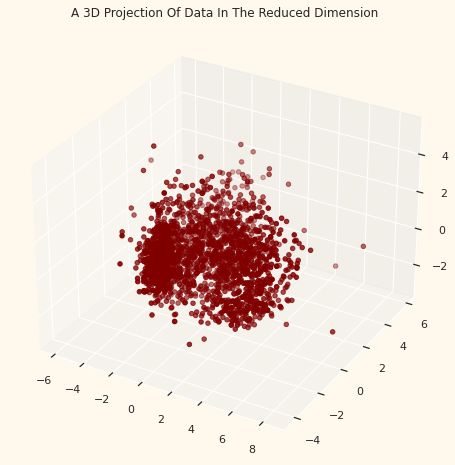

In [27]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


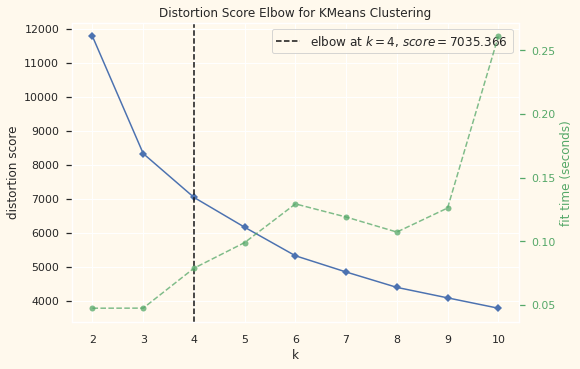

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [29]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

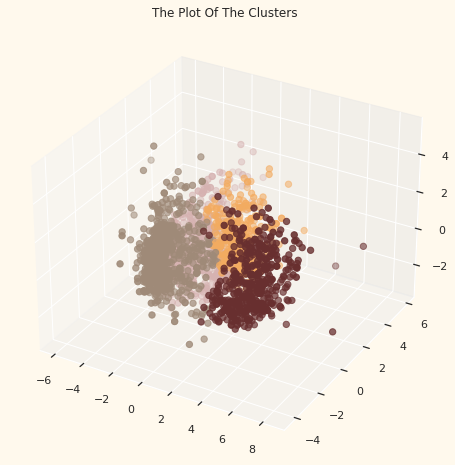

In [30]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating the model

In [31]:
df

,Education,Income,Recency,MntMeatProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total Promo,Clusters
0,0,58138.0,58,546,3,8,10,4,7,0,1,83894400000000000,64,1617,0,0,1,0,0,0
1,0,46344.0,38,6,2,1,1,2,5,0,0,10800000000000000,67,27,0,2,3,1,0,2
2,0,71613.0,26,127,1,8,2,10,4,0,0,40780800000000000,56,776,1,0,2,0,0,0
3,0,26646.0,26,20,2,2,0,4,6,0,0,5616000000000000,37,53,1,1,3,1,0,2
4,1,58293.0,94,118,5,5,3,6,5,0,0,27734400000000000,40,422,1,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,182,2,9,3,4,5,0,0,46742400000000000,54,1341,1,1,3,1,0,1
2236,1,64014.0,56,30,7,8,2,5,7,0,0,5270400000000000,75,444,1,3,5,1,1,1
2237,0,56981.0,91,217,1,2,3,13,6,0,0,27216000000000000,40,1241,0,0,1,0,1,0
2238,1,69245.0,8,214,2,6,5,10,3,0,0,27302400000000000,65,843,1,1,3,1,0,3


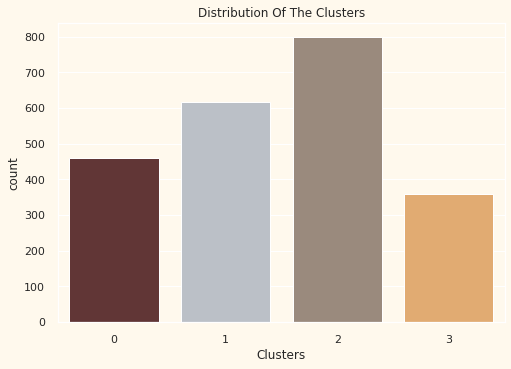

In [32]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
#, "#9E726F"
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show() 

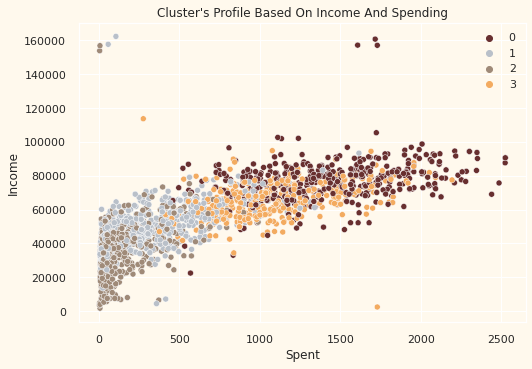

In [33]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

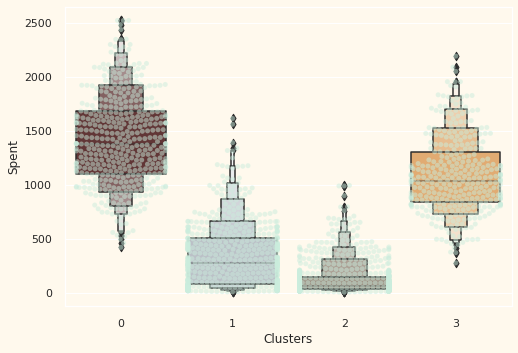

In [34]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

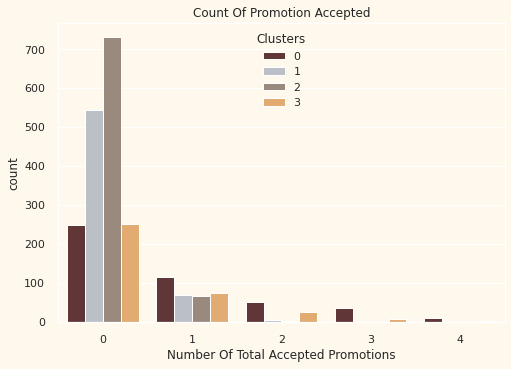

In [35]:
#Creating a feature to get a sum of accepted promotions 
#data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total Promo"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

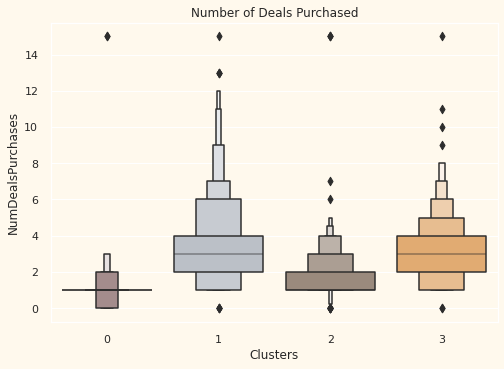

In [36]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show() 

# Profile

In [37]:
def cluster(feature):
    
    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=df[feature], y=df["Spent"], hue =df["Clusters"], kind="kde",height=10, palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
    axes.set_title(f"\nClustering Profile On {feature}\n",fontsize=25)
    axes.set_ylabel("Spending",fontsize=20)
    axes.set_xlabel(f"\n{feature}",fontsize=20)
    
    sns.despine(left=True, bottom=True)
    plt.show()

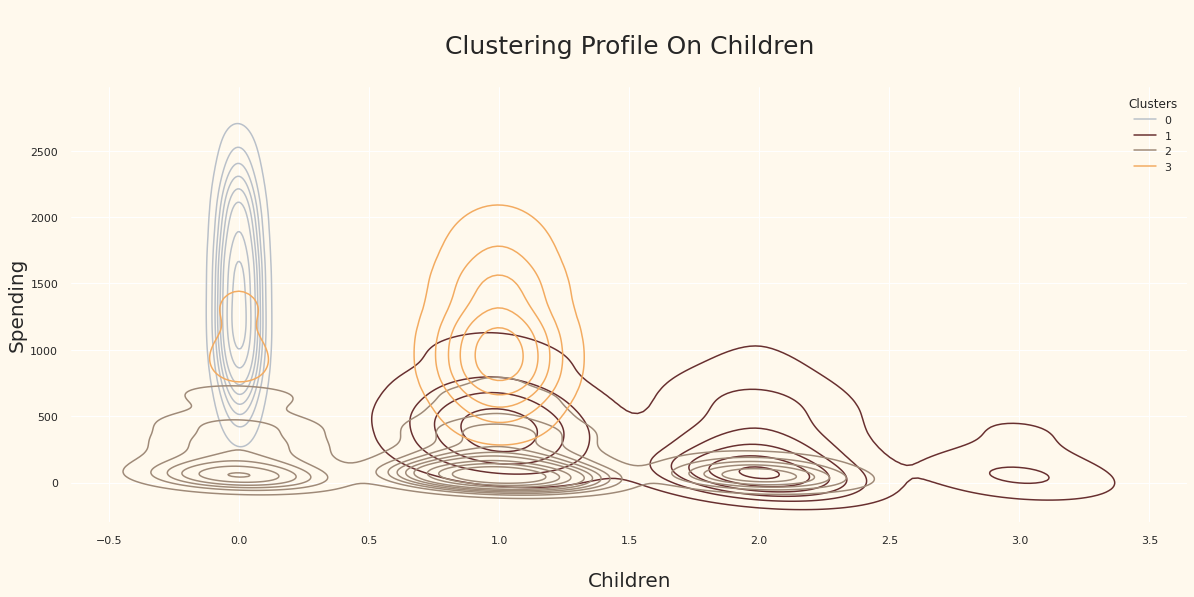

In [38]:
cluster("Children")

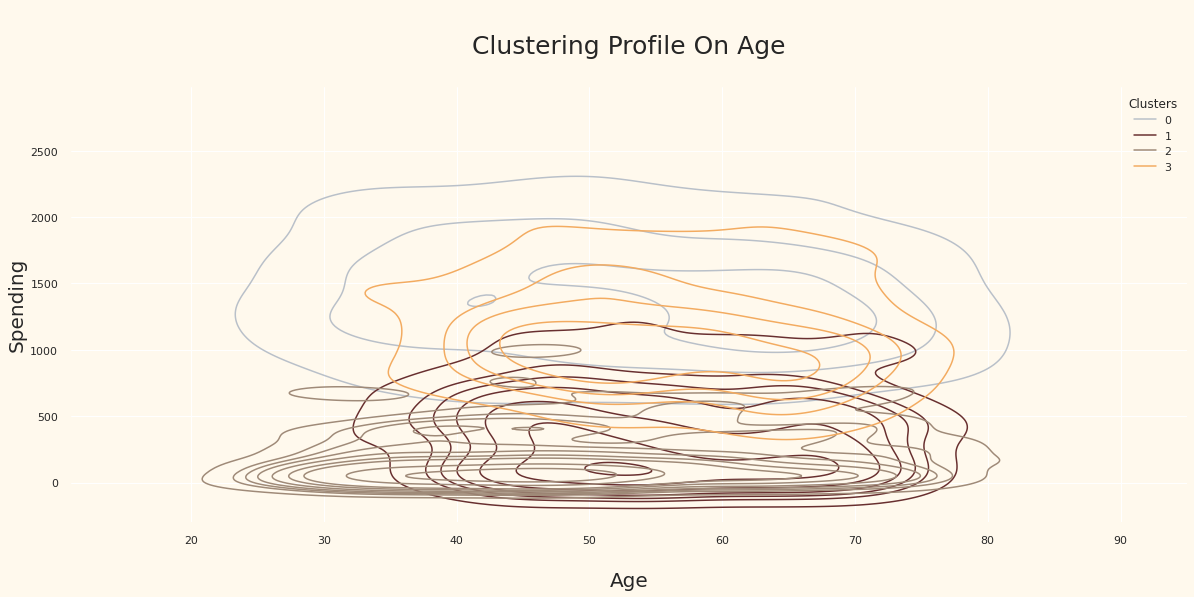

In [40]:
cluster("Age")

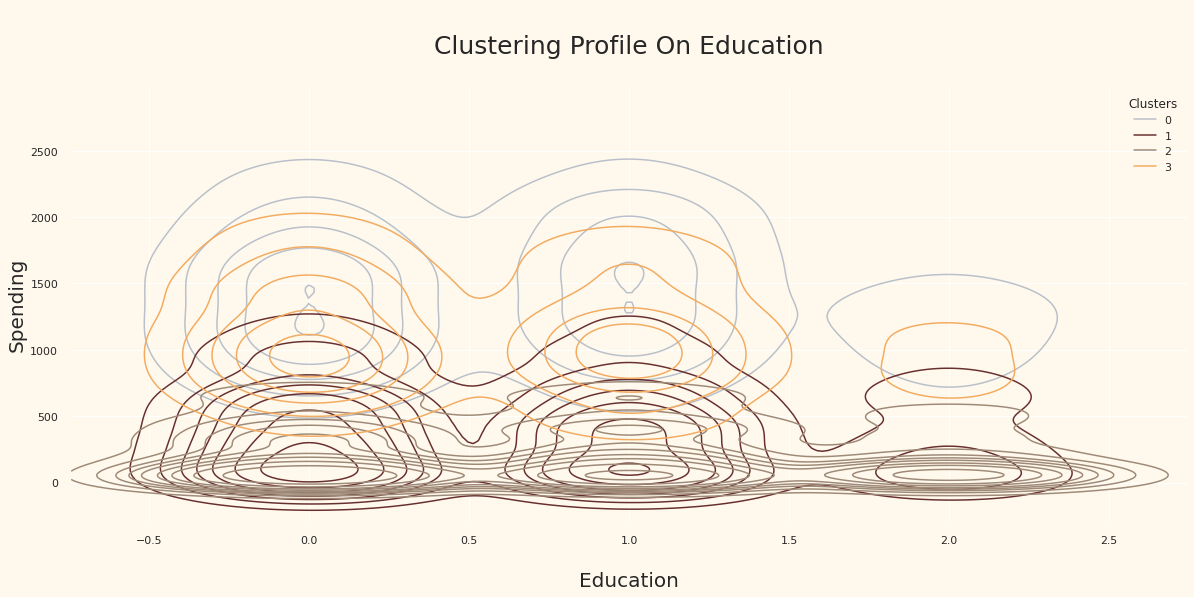

In [41]:
cluster("Education")

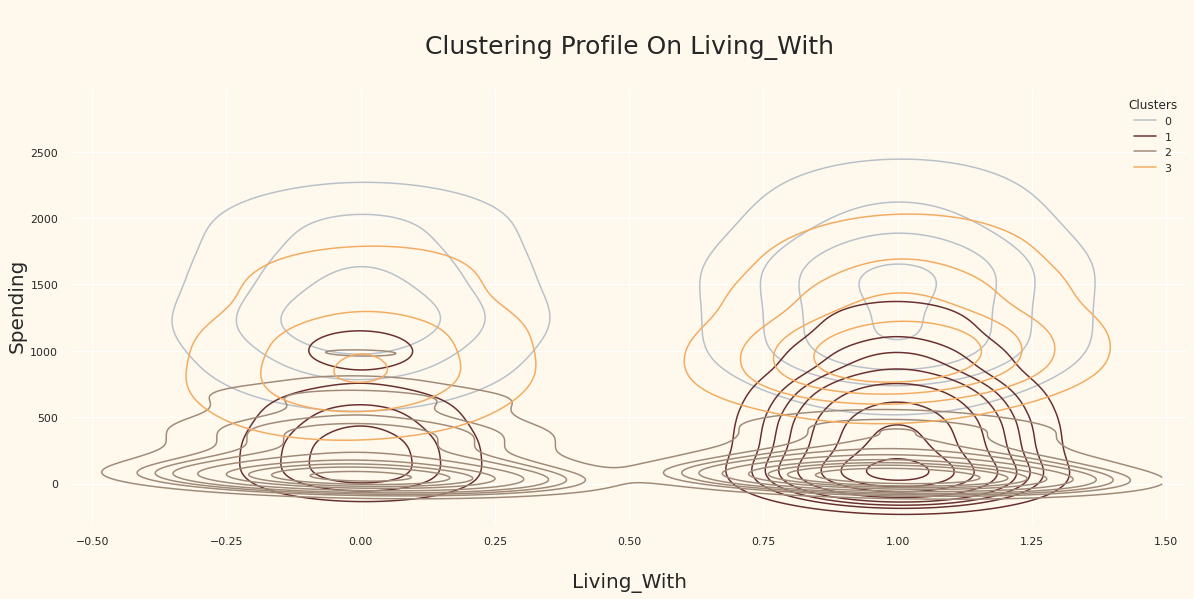

In [44]:
cluster('Living_With')

<Figure size 576x396 with 0 Axes>

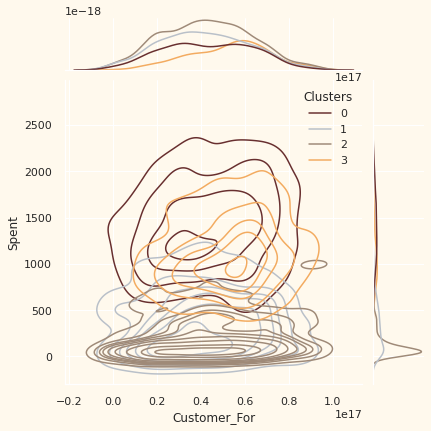

<Figure size 576x396 with 0 Axes>

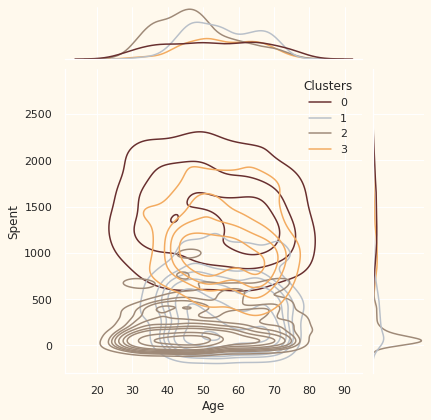

<Figure size 576x396 with 0 Axes>

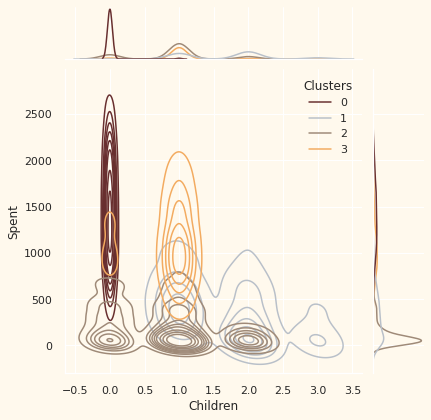

<Figure size 576x396 with 0 Axes>

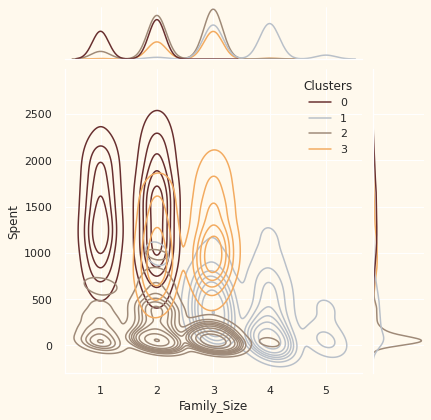

<Figure size 576x396 with 0 Axes>

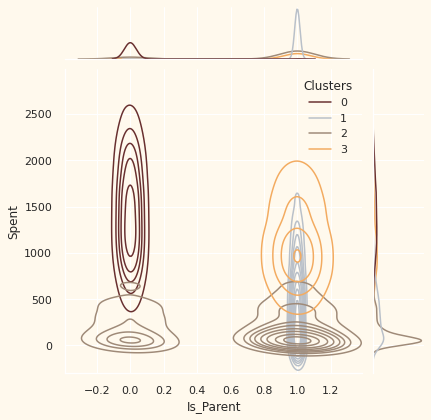

<Figure size 576x396 with 0 Axes>

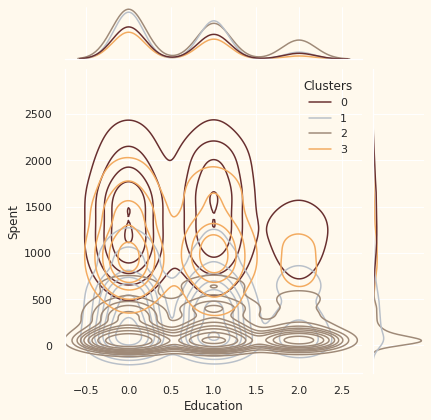

<Figure size 576x396 with 0 Axes>

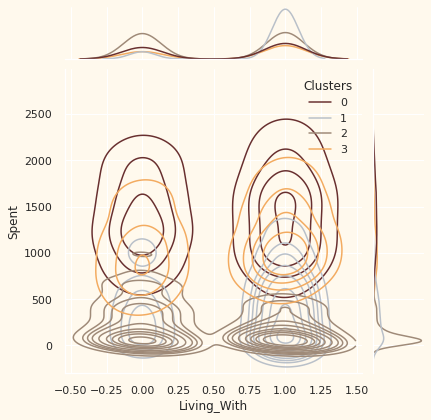

In [46]:
Personal = ["Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

# Conclusions

Cluster 0
1. Are a definitelly a parent.
2. At the max have 4 menbers in the family and at least 2.
3. Single parents are a subset of this group.
4. Most have a teenager at home.
5. Relatively older.

Cluster 1
1. Are a definitelly not a parent.
2. At the max have 2 menbers in the family.
3.A slight majority of couples over single people.  
4. Span all ages.
5. A high income group.

Cluster 2
1. The majority of these people are parents.
2. At the max have 3 menbers in the family.
3. They majorly have one kid(and not a teenager).
4. Relatively younger.

Cluster 3
1. They are a definitelly a parent.
2. At the max have 5 menbers in the family and at least 2.
3. Majorly of themhave a teenager at home.
4. Relatively older.
5. Alower income group.